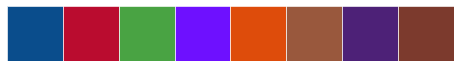

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
flatui = ["#0a4d8c", "#ba0c2f", "#49a343", "#6E10FF", "#DE4C0B", "#99583D", "#4d2177", "#7c3a2d"]
# https://color.adobe.com/zh/create/color-wheel/?basfrom matplotlib import rc
sns.palplot(flatui)

In [2]:
!ls

Gibbs_errors_10_20_1000000.csv errors_5_50.csv
Gibbs_potts.py                 errors_5_50_100000.csv
MGPMH_errors_10_20_1000000.csv plott_potts.ipynb
Marginals_50.pdf               potts.py
data                           potts.py.lprof
errors1_5.csv                  potts_video.py
errors_151020_20_100000.csv    potts_video.py.lprof
errors_151020_20_1000000.csv   run.sh
errors_151020_20_500000.csv    test.py
errors_151020_50_1000.csv


In [8]:
error = np.genfromtxt('MGPMH_errors_10_20_1000000.csv',delimiter=',')

In [19]:
error[:,0]

array([ 15.18881376,   3.79720344,   1.51888138])

In [58]:
error[0,:]

array([ 15.18881376,   3.79720344,   1.51888138])

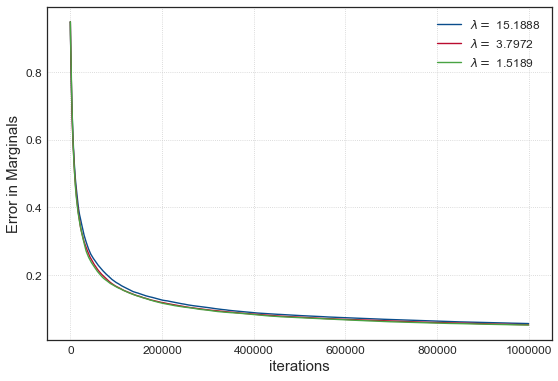

In [76]:
import matplotlib.lines as lines
with sns.axes_style("white"):
    fig = plt.figure(figsize=(8, 5.5))
    ax  = fig.add_subplot(111)
    for i in range(error.shape[0]):
        line = error[i,1:]
        plt.plot(line,color=flatui[i],label="$\lambda = $ {0:.4f}".format(error[i,0]))

    plt.xlabel("iterations", size=15)
    plt.ylabel("Error in Marginals", size=15)
#     plt.title('50 by 50 Potts model')
    plt.legend(loc='upper right')
    plt.grid(linestyle='dotted')
    plt.tight_layout(pad=1, w_pad=1, h_pad=1)

    plt.savefig("Marginals_{}.pdf".format('50'), bbox_inches='tight')
    plt.show()

In [9]:
gibbs_error = np.genfromtxt('Gibbs_errors_10_20_1000000.csv',delimiter=',')

In [10]:
gibbs_error.shape

(4, 1000000)

In [11]:
gibbs_error[0,0]

0.94868329805051355

In [14]:
lam = [1,3,15]

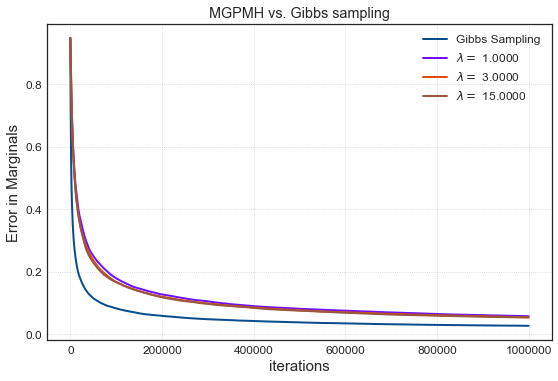

In [18]:
import matplotlib.lines as lines
with sns.axes_style("white"):
    fig = plt.figure(figsize=(8, 5.5))
    ax  = fig.add_subplot(111)
    for i in range(1):
        line = gibbs_error[i,1:]
        plt.plot(line,color=flatui[i],linewidth=2,label="Gibbs Sampling".format(i))

    for i in range(error.shape[0]):
        line = error[i,1:]
        plt.plot(line,color=flatui[3+i],linewidth=2,label="$\lambda = $ {0:.4f}".format(lam[i]))
    plt.xlabel("iterations", size=15)
    plt.ylabel("Error in Marginals", size=15)
    plt.title('MGPMH vs. Gibbs sampling')
    plt.legend(loc='upper right')
    plt.grid(linestyle='dotted')
    plt.tight_layout(pad=1, w_pad=1, h_pad=1)

    plt.savefig("Marginals_{}.pdf".format('50'), bbox_inches='tight')
    plt.show()

In [80]:
!ls

Gibbs_errors_10_20_1000000.csv errors_5_50.csv
Gibbs_potts.py                 errors_5_50_100000.csv
MGPMH_errors_10_20_1000000.csv plott_potts.ipynb
Marginals_50.pdf               potts.py
errors1_5.csv                  potts.py.lprof
errors_151020_20_100000.csv    potts_video.py
errors_151020_20_1000000.csv   potts_video.py.lprof
errors_151020_20_500000.csv    run.sh
errors_151020_50_1000.csv      test.py
